In [6]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
sys.path.insert(0, '/home/reza/erq/')
from erqml import *
import sys
sys.path.insert(0, '/home/reza/erq')
from scipy import interpolate
# import pyfits
from numpy import *
import math
import scipy.ndimage
from scipy import interpolate
from numpy import nanmean
from numpy import nanmedian
from readSDSSspectrafast import *
import matplotlib.pylab as plt
import numpy as np
from erqml import *
from scipy import ndimage
from line_db import line_db
import os
# Reading data
# smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
smp=Table.read('/home/reza/erq/sampling/LM_sample.fits')
W3_0=smp['ABw3']
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12=smp['z_dr12']
nqsos=len(iW3_0)
smp.columns


<TableColumns names=('sdss_name','Plate','MJD','FiberID','ThingID','z_dr12','snr_1700','snr_spec','bal_flag_vi','bi_civ','err_bi_civ','ai_civ','err_ai_civ','vmin_civ_450','fwhm_civ','rewe_civ','err_rewe_civ','f1450','alpha_civ','alpha_nv','alpha_all','alphae_all','alpha_allc','alphae_allc','rew_gf','rewe_gf','rewsnr_gf','rew_gfc','rew_gfw','qflag','fwhm_gf','fwhme_gf','fwhmsnr_gf','fwhm_gfc','fwhm_gfw','sigma_gf','peak_gf','peaksnr_gf','rat_gf','wcent_gf','wciv0_gf','wcore_gf','wcoree_gf','shift_gf','asy_gf','kurt75_gf','kurt80_gf','rew_di','rewe_di','fwhm_di','peak_di','wciv_di','rew_nv','frat_nv/civ','crat_nv/civ','scale','nvflag','ABg','ABg_err','ABr','ABr_err','ABi','ABi_err','ABz','ABz_err','Mi','ABw1','ABw1_snr','ABw2','ABw2_snr','ABw3','ABw3_snr','ABw4','ABw4_snr','r-z','i-w1','i-w3','r-w3','i-w4','r-w4','w3-w4','uniform','boss_tar1','anc_tar1','anc_tar2','sdss_dr7','cc_flags','ABy','ABy_err','ABj','ABj_err','ABh','ABh_err','ABk','ABk_err','first_matched','first_flux','first_snr

In [3]:
#  ---------r-z sample
z_cut=2.8
W3_rz= W3_0[z_dr12<=z_cut]
iW3_rz = iW3_0[z_dr12<=z_cut]
kt80_rz= kt80_0[z_dr12<=z_cut]
rew_rz = rew_0[z_dr12<=z_cut]
frat_rz = frat_0[z_dr12<=z_cut]
fwhm_rz = fwhm_0[z_dr12<=z_cut]
rw3_rz=rw3_0[z_dr12<=z_cut]
rz_rz=rz_0[z_dr12<=z_cut]
iz_rz = iW3_rz - rw3_rz + rz_rz
Lum_rz = Lum_0[z_dr12<=z_cut]
z_dr12_rz = z_dr12[z_dr12<=z_cut]

In [12]:

X = np.array(list(zip(iW3_rz, rz_rz, rew_rz)))
X_sc, s, m = MinMaxScaler(X)


In [13]:
from sklearn import svm
from sklearn.cluster import AgglomerativeClustering
X_tr = X_sc
ERQ_rz_sc = X_tr[((iW3_rz>4.6) & (rew_rz>2))]
ERQ_rz = X[((iW3_rz>=4.6) & (rew_rz>=2))]

4 complete


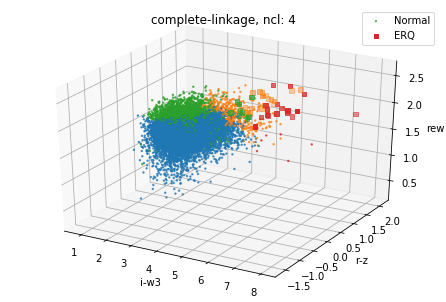

4 average


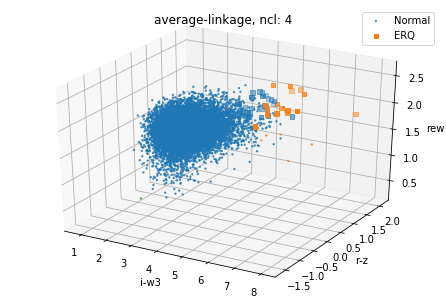

In [31]:
for link in [ 'complete', 'average']:
    for ncl in [4,8]:
        print(ncl, link)
        model = AgglomerativeClustering(n_clusters=ncl, linkage=link, affinity='euclidean').fit(X_tr)
        labels = model.labels_
        colors = ['C0', 'C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8']
        color_code=[]
        for i in range(len(X_sc)):
                color_code.append(colors[labels[i]])
        color_code=np.array(color_code)
        fg = plt.figure()
        ax = Axes3D(fg)
        color_ERQ = color_code[(iW3_rz>=4.6)& (rew_rz>=2)]
        X_blue = X[(iW3_rz<4.6 )| (rew_rz<2)]
        color_blue = color_code[(iW3_rz<4.6) | (rew_rz<2)]
        ax.scatter(X_blue[:,0], X_blue[:,1], X_blue[:,2],  c=color_blue, alpha=0.7, s=2,label='Normal')
        ax.set_xlabel('i-w3')
        ax.set_ylabel('r-z')
        ax.set_zlabel('rew')
#         plt.scatter(X[:,0], X[:,1],  c=color_code, alpha=0.7, s=2)
        ax.scatter(ERQ_rz[:,0], ERQ_rz[:,1], ERQ_rz[:,2], s=20, label ='ERQ', marker='s', c=color_ERQ)
#         plt.axvline(x=4.6, ymin=0.6)
#         plt.axhline(y=2, xmin=0.6)
        ax.set_title(link + '-linkage, ncl: %d' %ncl)
        plt.legend()
        plt.savefig('3d/3d-rz-iw3-ncl-%d-link-%s.pdf' %(ncl, link)) #,format='pdf', dpi=1200, bbox_inches='tight')
        plt.show()
        

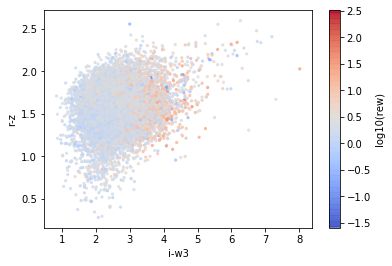

In [4]:
plt.scatter(iW3_rz, rew_rz, c =rz_rz, cmap='coolwarm', alpha=0.7, s=5)
plt.xlabel('i-w3')
plt.ylabel('r-z')
# plt.scatter(X[:,0], X[:,1], c =X[:,2], cmap='coolwarm', alpha=0.7, s=7)
plt.colorbar(label='log10(rew)')
plt.savefig('iw3-rz-cmap-rew.pdf', dpi=1200, bbox_inches='tight')

In [35]:
!ls


2d-rz-iw3  3d		    Agg-rz-iw3.ipynb  iw3-rz-cmap-rew.pdf
2d-rz-rew  Agg-rz-3d.ipynb  Agg-rz-rew.ipynb


In [5]:
7000/1560-1

3.4871794871794872